In [1]:
import pandas

In [2]:
from nltk.corpus import wordnet as wn
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

Using TensorFlow backend.
c:\users\gulja\python 3.7.3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\gulja\python 3.7.3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\gulja\python 3.7.3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\gulja\python 3.7.3\lib\site-packages\tensorflow\python\framewo

In [3]:
df=pd.read_csv('labels.csv')

In [4]:
df

,event_id,Words,POS,Index,Tag,Labels,Tag2
0,0,A,DT,0,O,0.0,O
1,0,shooting,NN,2,O,0.0,O
2,0,takes,VBZ,11,O,0.0,O
3,0,place,NN,17,O,0.0,O
4,0,at,IN,23,O,0.0,O
5,0,a,DT,26,O,0.0,O
6,0,pub,NN,28,arg,1.0,O
7,0,in,IN,31,O,0.0,relation
8,0,Tel,NNP,35,arg,1.0,O
9,0,Aviv,NNP,39,arg,1.0,O


# 1. Small checker 

In [5]:
# for i in range(0,25662):
#     if df.loc[i,'Words']=='Northrop':
#         print("\n")
#         print(i)
#         print(df.loc[i,'event_id'])
        
#         print(df.loc[i,'Words'])
#         print(df.loc[i+1,'Words'])
#         print(df.loc[i+2,'Words'])
#         print(df.loc[i+3,'Words'])
    

In [6]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t,m) for w, p, t,m in zip(s["Words"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist(),
                                                           s["Tag2"].values.tolist())]
        self.grouped = self.data.groupby("event_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None
getter = SentenceGetter(df)


In [7]:
words = set(df["Words"].values.tolist())
# words.append("ENDPAD")
n_words = len(words); 
print(n_words)
tags = set(df["Tag"].values.tolist())
n_tags = len(tags); 
tags2 = set(df["Tag2"].values.tolist())
n_tags2 = len(tags2); 
print(n_tags2)
sent = getter.get_next()
print(sent)



10767
2
[('A', 'DT', 'O', 'O'), ('new', 'JJ', 'O', 'O'), ('28foot', 'NN', 'O', 'O'), ('tall', 'JJ', 'O', 'O'), ('statue', 'NN', 'O', 'O'), ('of', 'IN', 'O', 'O'), ('Jesus', 'NNP', 'arg', 'O'), ('dubbed', 'VBN', 'O', 'O'), ('de', 'FW', 'arg', 'O'), ('Greatest', 'JJS', 'arg', 'O'), ('is', 'VBZ', 'O', 'O'), ('unveiled', 'VBD', 'O', 'relation'), (' on ', 'IN', 'O', 'relation'), ('New', 'NNP', 'arg', 'O'), ('Years', 'NNS', 'arg', 'O'), ('Day', 'NNP', 'O', 'O'), ('outside', 'IN', 'O', 'O'), ('St.', 'NNP', 'O', 'O'), ('Aloysius', 'NNP', 'O', 'O'), ('Catholic', 'NNP', 'O', 'O'), ('Church', 'NNP', 'O', 'O'), (' in ', 'IN', 'O', 'O'), ('Abajah', 'NNP', 'O', 'O'), ('village', 'NN', 'O', 'O'), ('Nigerias', 'NNP', 'O', 'O'), ('Imo', 'NNP', 'O', 'O'), ('state', 'NN', 'O', 'O'), ('which', 'WDT', 'O', 'O'), ('described', 'VBN', 'O', 'O'), (' as ', 'IN', 'O', 'O'), ('tallest', 'JJS', 'O', 'O'), ('Africa', 'NNP', 'O', 'O')]


In [8]:
sentences = getter.sentences

In [9]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [10]:
max_len = 278
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
word2idx = {w: i for i, w in enumerate(words)} #vocab for words
# print(tag2idx)
tag2idx = {t: i for i, t in enumerate(tags)} #vocab for tags arguments
tag22idx = {t: i for i, t in enumerate(tags2)} #vocab for tags relation
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words - 1)
#......................output 1 label arguments........................
y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])
y = [to_categorical(i, num_classes=n_tags) for i in y]
#.....................output 2 label Relations..........................
y1 = [[tag22idx[w[3]] for w in s] for s in sentences]
y1 = pad_sequences(maxlen=max_len, sequences=y1, padding="post", value=tag22idx["O"])
y1 = [to_categorical(i, num_classes=n_tags2) for i in y1]


X_tr, X_te, y_tr, y_te,y1_tr, y1_te = train_test_split(X,y, y1, test_size=0.1)

In [11]:
len(y)

2018

In [12]:
from keras.layers import Layer
import keras.backend as K

In [13]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [14]:
from keras import optimizers

input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=250, input_length=max_len)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="sigmoid"))(model)  # softmax output layer
out1 = TimeDistributed(Dense(n_tags2, activation="sigmoid"))(model) 
model = Model(input, [out,out1])
adam1 = optimizers.adam(lr=0.01)
model.compile(optimizer=adam1,loss="binary_crossentropy", metrics=["accuracy",f1_m,precision_m, recall_m])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# history = model.fit(X_tr, [np.array(y_tr),np.array(y1_tr)],validation_data=(X_te, [y_te,y1_te]), batch_size=32, epochs=5, validation_split=0.2, verbose=1)
history = model.fit(X_tr, [np.array(y_tr),np.array(y1_tr)], batch_size=32, epochs=5, validation_split=0.1, verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 1634 samples, validate on 182 samples
Epoch 1/5
1634/1634 [==============================] - 52s 32ms/step - loss: 0.1159 - time_distributed_1_loss: 0.0700 - time_distributed_2_loss: 0.0458 - time_distributed_1_acc: 0.9760 - time_distributed_1_f1_m: 0.9745 - time_distributed_1_precision_m: 0.9798 - time_distributed_1_recall_m: 0.9717 - time_distributed_2_acc: 0.9909 - time_distributed_2_f1_m: 0.9907 - time_distributed_2_precision_m: 0.9917 - time_distributed_2_recall_m: 0.9899 - val_loss: 0.0587 - val_time_distributed_1_loss: 0.0399 - val_time_distributed_2_loss: 0.0188 - val_time_distributed_1_acc: 0.9828 - val_time_distributed_1_f1_m: 0.9828 - val_time_distributed_1_precision_m: 0.9823 - val_time_distributed_1_recall_m: 0.9833 - val_time_distributed_2_acc: 0.9945 - val_time_distributed_2_f1_m: 0.9945 - val_time_distributed_2_precision_m: 0.9945 - val_time_distributed_2_recall_m: 0.9945
Epoch 2/5
1634/1634 [=====================

In [16]:
train_acc = model.evaluate(X_tr, [y_tr,y1_tr], verbose=0)
test_acc = model.evaluate(X_te,  [y_te,y1_te], verbose=0)
print(train_acc, test_acc)

[0.017817461444680386, 0.01145430888964216, 0.006363152665812276, 0.9960918901775377, 0.9960919647489875, 0.9960624628130035, 0.9961216034868215, 0.9979865217523953, 0.9979866427997135, 0.9979205819478644, 0.9980528795771662] [0.07541325540825872, 0.05457017991212335, 0.02084307656577318, 0.9826910790830555, 0.9826920734773769, 0.9826398314815936, 0.9827445125815892, 0.9938831170006553, 0.9938833146992296, 0.9938391252319412, 0.9939276387195776]


In [17]:
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

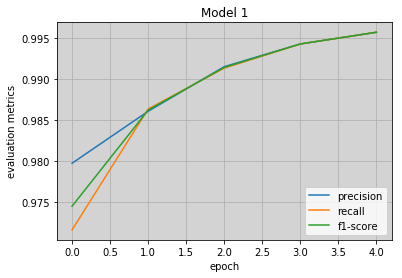

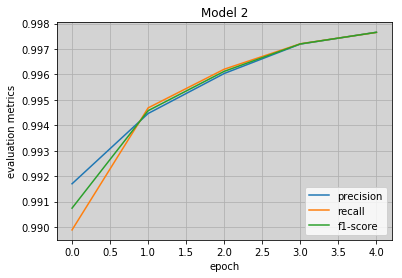

In [30]:
import matplotlib.pyplot as plt
# .......................................
plt.plot(history.history['time_distributed_1_precision_m'])
plt.plot(history.history['time_distributed_1_recall_m'])
plt.plot(history.history['time_distributed_1_f1_m'])
plt.title('Model 1')

plt.ylabel('evaluation metrics')
plt.xlabel('epoch')
plt.legend(['precision', 'recall','f1-score'], loc='lower right')
ax = plt.axes()
ax.set_facecolor("lightgrey")
plt.grid()
plt.show()


# ..................................................

plt.plot(history.history['time_distributed_2_precision_m'])
plt.plot(history.history['time_distributed_2_recall_m'])
plt.plot(history.history['time_distributed_2_f1_m'])
plt.title('Model 2')

plt.ylabel('evaluation metrics')
plt.xlabel('epoch')
plt.legend(['precision', 'recall','f1-score'], loc='lower right')
ax = plt.axes()
ax.set_facecolor("lightgrey")
plt.grid()
plt.show()

In [43]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_te)
y_pred = np.argmax(y_pred1, axis=1)

# # Print f1, precision, and recall scores
# print(precision_score(y_te, y_pred , average="macro"))
# print(recall_score(y_te, y_pred , average="macro"))
# print(f1_score(y_te, y_pred , average="macro"))

In [44]:
y_pred

array([[[ 14, 179],
        [ 18,   3],
        [  6, 178],
        ...,
        [193,  84],
        [193,  84],
        [193,  84]],

       [[ 79, 101],
        [ 10, 161],
        [ 56, 127],
        ...,
        [132, 178],
        [132,  84],
        [132,  84]]], dtype=int64)

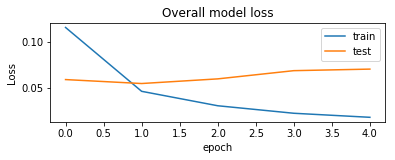

In [19]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Overall model loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

In [20]:
import matplotlib.pyplot as plt
pyplot.subplot(211)
pyplot.title('Model 1 loss')
pyplot.plot(history.history['time_distributed_4_loss'], label='train')
pyplot.plot(history.history['val_time_distributed_4_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('epoch')
pyplot.legend()

NameError: name 'pyplot' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Model 2 loss')
plt.plot(history.history['time_distributed_4_loss'], label='train')
plt.plot(history.history['val_time_distributed_4_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend()

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Model 1 accuracy')
pyplot.plot(history.history['time_distributed_3_acc'], label='train')
pyplot.plot(history.history['val_time_distributed_3_acc'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.subplot(212)
pyplot.title('Model 2 accuracy')
pyplot.plot(history.history['time_distributed_4_acc'], label='train')
pyplot.plot(history.history['val_time_distributed_4_acc'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.subplot(212)
pyplot.title('Recall')
pyplot.plot(history.history['time_distributed_24_recall_m'], label='train')
pyplot.plot(history.history['val_time_distributed_24_recall_m'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.subplot(212)
pyplot.title('Precision')
pyplot.plot(history.history['time_distributed_24_precision_m'], label='train')
pyplot.plot(history.history['val_time_distributed_24_precision_m'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.subplot(212)
pyplot.title('F1-Score')
pyplot.plot(history.history['time_distributed_24_f1_m'], label='train')
pyplot.plot(history.history['val_time_distributed_24_f1_m'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# scores = model.evaluate(vectorizer.transform(X_te), y_te, verbose=1)
# print("Accuracy:", scores[1])  # Accuracy: 0.875

In [ ]:
hist = pd.DataFrame(history.history)
# print(hist)

In [ ]:
hist.loc[49]

In [ ]:
# plt.figure(figsize=(12,12))
# plt.plot(hist["acc"])
# plt.plot(hist["val_acc"])
# plt.show()

In [ ]:
X_te

In [ ]:
pred

In [54]:
i = 100
p = model.predict(np.array([X_te[i]]))
p = np.argmax(p, axis=-1)
print('.....................................................................................')
print(p[0][0])
print("{:15} ({:5}): {}".format("Word", "True", "Pred"))
for w, pred in zip(X_te[i], p[0][0]):
    print("{:15}: {}".format(list(words)[w], list(tags)[pred]))
print('.....................................................................................')    
print(p[1][0])
for w, pred1 in zip(X_te[i], p[1][0]):
    print("{:15}: {}".format(list(words)[w], list(tags2)[pred1]))

.....................................................................................
[1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Word            (True ): Pred
The            : arg
bodies         : arg
of             : O
nine           : arg
Indian         : arg
Army           : arg
soldiers       : arg
killed         : O
 in            : O
an             : arg
avalanche      : arg
 on            : O
Siachen        : arg
Glacier        : arg
will           : O
be            

In [55]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report


In [56]:
test_pred = model.predict(X_te, verbose=1)


202/202 [==============================] - 1s 4ms/step


In [57]:
idx2tag = {i: w for w, i in tag2idx.items()}



In [58]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    


In [59]:
pred_labels = pred2label(test_pred[1])

In [60]:

test_labels = pred2label(y_te)

In [61]:
# y_val_pred=model.predict_classes(y_te)
 

In [62]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))


F1-score: 0.0%


In [63]:
confusion_matrix(test_labels, pred_labels)

ValueError: multiclass-multioutput is not supported

In [64]:
print(classification_report(test_labels, pred_labels))


           precision    recall  f1-score   support

      arg       0.00      0.00      0.00       426

micro avg       0.00      0.00      0.00       426
macro avg       0.00      0.00      0.00       426

